In [1]:
# k crossover d，close > ema 8, ema 8 > ema 18, ema 18 > 38, take profit atr, stop loss atr
# Variables :
# time - 15m, 1h
# start time - 1609492611000, 1641028611000, 1672564611000 (2021, 2022, 2023) 1677632461000
# tp atr - 4, 6
# sl atr - 3, 5
# sl - Close, Low

In [2]:
# ! conda install -c conda-forge ta --yes

In [3]:
import requests
import pandas as pd
import ta
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import time

In [4]:
interval_arr = ['15m', '1h', '4h', '1d']
start_time_arr = [1677632461000]
ema_arr = [8, 18, 38]
bb_arr = ['bb_u', 'bb_m', 'bb_l']

In [5]:
timezone = 8
endpoint = 'wss://stream.binance.com:9443/ws'
symbol = 'ethusdt'
symbol_C = symbol.upper()
interval = '15m'

start_time = 1679274061000
end_time = round(time.time() * 1000)

# step between timestamps in milliseconds
step = 60000 * 3600

In [6]:
pro_per = 0.04
sl_atr = 0.025

In [7]:
def create_raw(symbol, interval_arr, start_time, end_time, step):
    
    url = "https://api.binance.com/api/v3/klines"
    
    for interval in interval_arr:

        raw_df = pd.DataFrame()
        
        for timestamp in range(start_time, end_time, step):
            params = {"symbol": symbol_C,
                      "interval": interval,
                      "startTime": timestamp,
                      "endTime": timestamp + step}
            response = requests.get(url, params=params).json()
            out = pd.DataFrame(response, columns = ["Open time", "Open", "High", "Low", "Close",
                                                   "Volume", "Close_Time", "Quote asset volume",
                                                   "Number of trades", "Taker buy base asset volume",
                                                   "Taker buy quote asset volume", "Ignore"])
            raw_df = pd.concat([raw_df, out], axis = 0)

        raw_df = raw_df[['Close_Time', 'Open', 'Close', "High", "Low", 'Volume']]

        raw_df.to_hdf(f'klines_{symbol}_{interval}.h5', key='df', mode='w')
        print(f"Created {symbol}_{interval}")

In [8]:
loop_start_time = time.time()
create_raw(symbol, interval_arr, min(start_time_arr), end_time, step)
loop_end_time = time.time()
print("Time taken to execute for loop:", loop_end_time - loop_start_time, "seconds")

Created ethusdt_15m
Created ethusdt_1h


C:\Users\George\AppData\Local\Temp\ipykernel_6940\1070508557.py:23: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['Close_Time', 'Open', 'Close', 'High', 'Low', 'Volume'], dtype='object')]

  raw_df.to_hdf(f'klines_{symbol}_{interval}.h5', key='df', mode='w')


Created ethusdt_4h
Created ethusdt_1d
Time taken to execute for loop: 9.015012979507446 seconds


C:\Users\George\AppData\Local\Temp\ipykernel_6940\1070508557.py:23: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['Close_Time', 'Open', 'Close', 'High', 'Low', 'Volume'], dtype='object')]

  raw_df.to_hdf(f'klines_{symbol}_{interval}.h5', key='df', mode='w')


In [9]:
h5 = pd.read_hdf(f'klines_{symbol}_{interval_arr[-1]}.h5', key='df')
print(h5)

      Close_Time           Open          Close           High            Low  \
0  1677801599999  1665.23000000  1647.86000000  1677.86000000  1619.18000000   
1  1677887999999  1647.86000000  1569.45000000  1649.25000000  1544.39000000   
0  1677974399999  1569.45000000  1566.73000000  1577.53000000  1549.12000000   
1  1678060799999  1566.74000000  1564.58000000  1588.77000000  1553.05000000   
2  1678147199999  1564.57000000  1565.84000000  1583.49000000  1554.44000000   
0  1678233599999  1565.84000000  1561.96000000  1584.49000000  1536.14000000   
1  1678319999999  1561.95000000  1532.38000000  1570.89000000  1523.61000000   
0  1678406399999  1532.38000000  1437.32000000  1546.45000000  1408.00000000   
1  1678492799999  1437.32000000  1426.44000000  1439.43000000  1368.39000000   
2  1678579199999  1426.43000000  1471.97000000  1478.07000000  1408.40000000   
0  1678665599999  1471.93000000  1580.33000000  1594.19000000  1448.30000000   
1  1678751999999  1580.33000000  1673.45

In [10]:
klines_cache = {}

def get_klines(symbol, interval, start_time, end_time):
    if (symbol, interval) not in klines_cache:
        klines_cache[(symbol, interval)] = pd.read_hdf(f'klines_{symbol}_{interval}.h5', key='df')

    df = klines_cache[(symbol, interval)].query(f"Close_Time >= {start_time} and Close_Time <= {end_time}")

    df = df[['Close_Time', 'Open', 'Close', "High", "Low", 'Volume']]

    df = df.set_index('Close_Time')
#     df = df.reset_index(drop=True)

    return df

In [11]:
def time_format(timezone):
#     df['Close_Time'] = pd.to_datetime(df['Close_Time'], unit='ms') + pd.Timedelta(hours=timezone)
#     df['Close_Time'] = df['Close_Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=timezone)
#     df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

                            Open    Close     High      Low      Volume
Close_Time                                                             
2023-03-20 09:59:59.999  1771.42  1774.79  1779.40  1761.62  22381.7584
2023-03-20 10:59:59.999  1774.78  1766.58  1779.82  1750.40  32925.0012
2023-03-20 11:59:59.999  1766.59  1751.40  1768.45  1742.00  32415.0809
2023-03-20 12:59:59.999  1751.41  1752.14  1755.24  1736.57  20909.6716
2023-03-20 13:59:59.999  1752.14  1759.17  1759.82  1751.01  13816.1575
...                          ...      ...      ...      ...         ...
2023-04-15 06:59:59.999  2104.11  2104.77  2106.45  2097.69  13567.3559
2023-04-15 07:59:59.999  2104.78  2099.99  2111.61  2096.80  13866.3438
2023-04-15 08:59:59.999  2099.99  2086.00  2106.11  2082.44  25478.4574
2023-04-15 09:59:59.999  2086.01  2081.26  2087.41  2071.13  16045.7514
2023-04-15 10:59:59.999  2081.26  2089.05  2091.50  2081.26  21822.6182

[625 rows x 5 columns]


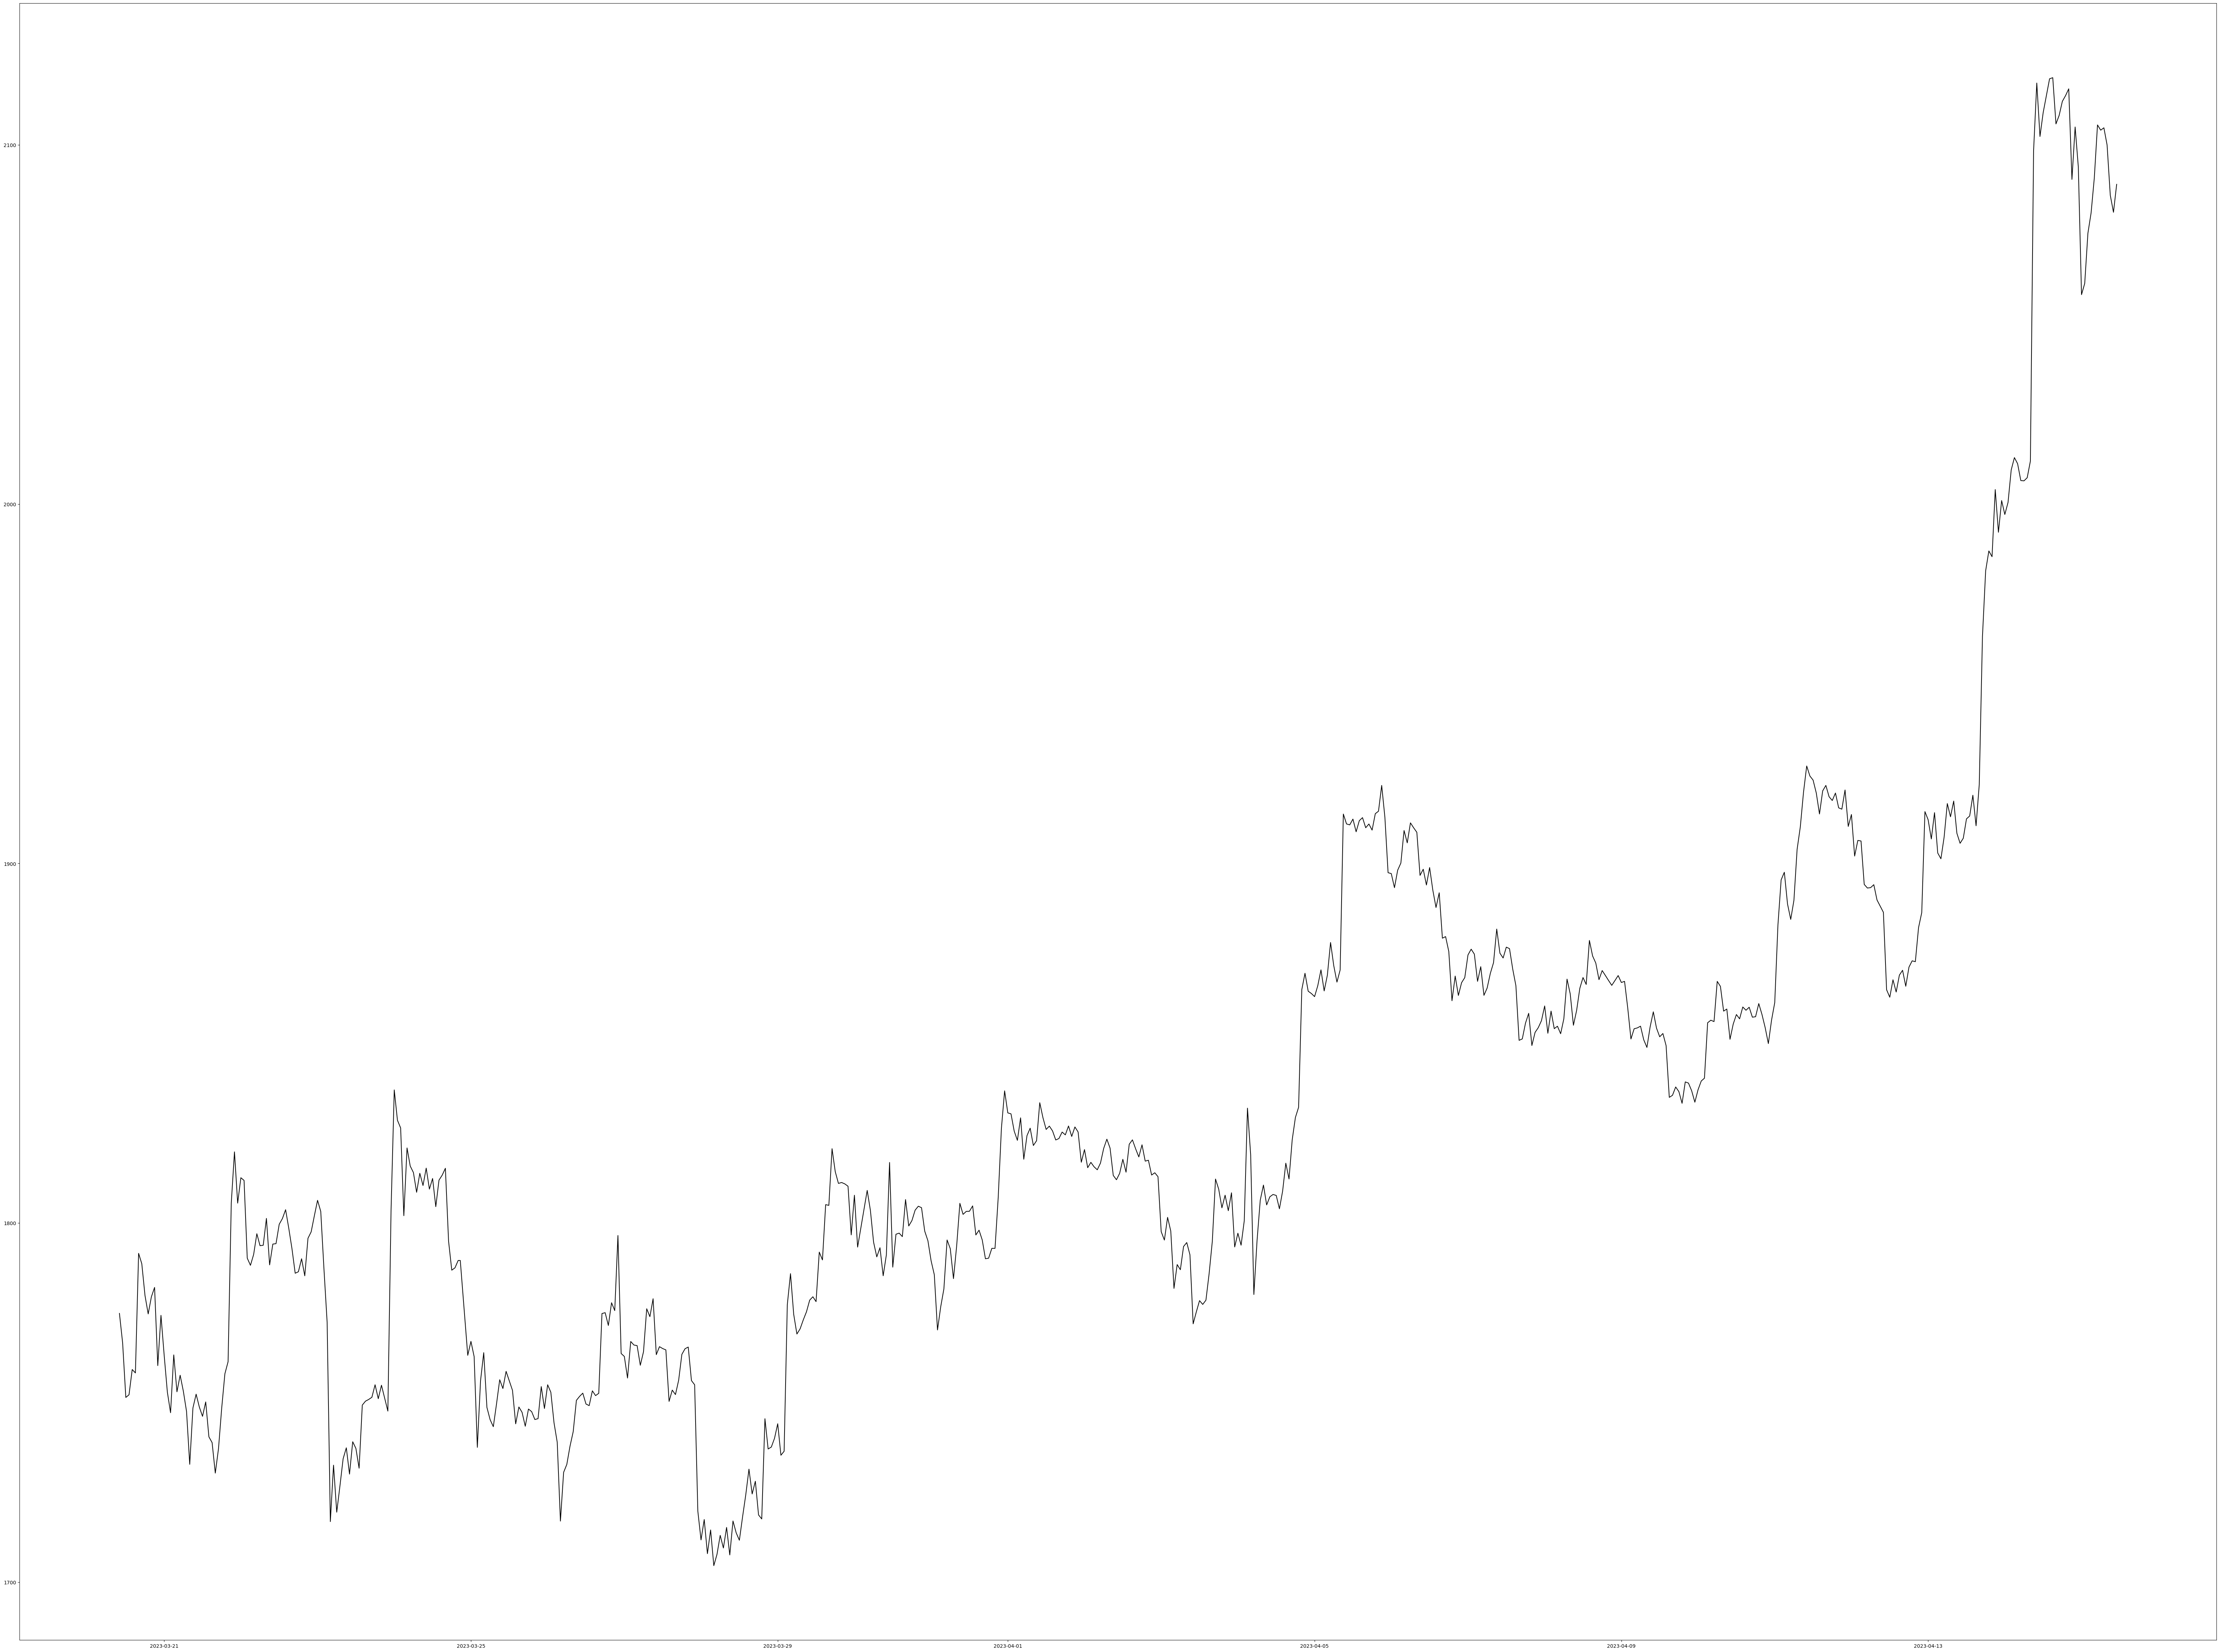

In [12]:
df = get_klines(symbol, interval_arr[1], start_time, end_time).copy()
df = df.astype(float)
df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=timezone)

print(df)
plt.figure(figsize=(80, 60))
plt.plot(df.index, df.Close, label = 'Close', c ='black')

In [13]:
slice_ = slice(-100, None) 
sample = df.iloc[slice_]['High'].to_numpy()
sample_df = df.iloc[slice_].copy()
print(type(slice_))

<class 'slice'>


In [14]:
from scipy.signal import argrelextrema

maxima = argrelextrema(sample, np.greater)
minima = argrelextrema(sample, np.less)

extrema = np.concatenate((maxima, minima), axis = 1)[0]
extrema_prices = np.concatenate((sample[maxima], sample[minima]))

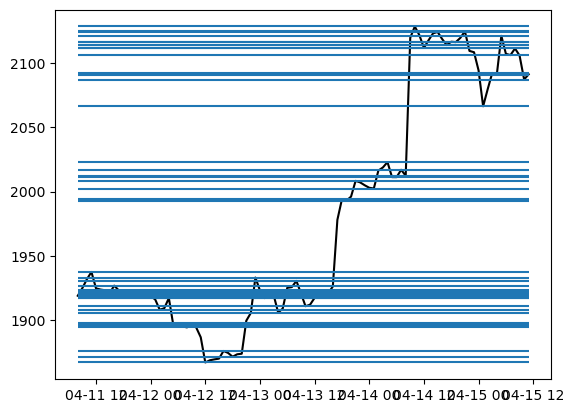

In [15]:
plt.plot(df.index[slice_], df.High[slice_], label = 'Close', c ='black')
for x in extrema_prices:
    plt.hlines(x, xmin = df.index[slice_.start], xmax = df.index[-1])

1937.37


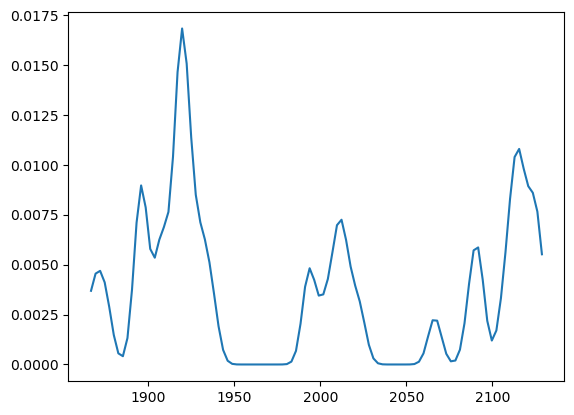

In [16]:
from sklearn.neighbors import KernelDensity

initial_price = extrema_prices[0]
print(initial_price)

kde = KernelDensity(kernel = 'gaussian', bandwidth = initial_price/500).fit(extrema_prices.reshape(-1, 1))

a, b = min(extrema_prices), max(extrema_prices)
price_range = np.linspace(a, b, 100).reshape(-1, 1)
pdf = np.exp(kde.score_samples(price_range))
plt.plot(price_range, pdf)

In [17]:
from scipy.signal import find_peaks

peaks = find_peaks(pdf)[0]
print(peaks)

[ 2 11 20 48 55 75 85 94]


In [18]:
def draw_candle_chart(df, lines, region = None):
     
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figwidth(10)
    
    # body and tail width
    width = .03
    width2 = .005
    # 100 candles, width = .03, width2 = .005
    
    
    up = df[df.Close >= df.Open]
    down = df[df.Close < df.Open]    
    col1 = 'green'
    col2 = 'red'
        
    
    # up prices
    plt.bar(up.index, up.Close - up.Open, width, bottom = up.Open, color = col1)
    plt.bar(up.index, up.High - up.Close, width2, bottom = up.Close, color = col1)
    plt.bar(up.index, up.Low - up.Open, width2, bottom = up.Open, color = col1)
    
    plt.bar(down.index, down.Close - down.Open, width, bottom = down.Open, color = col2)
    plt.bar(down.index, down.High - down.Open, width2, bottom = down.Open, color = col2)
    plt.bar(down.index, down.Low - down.Close, width2, bottom = down.Close, color = col2)
    
    plt.xticks(rotation = 45, ha='right')
    
    for x in lines:
        plt.hlines(x, xmin = df.index[0], xmax = df.index[-1])
        if region is not None:
            plt.fill_between(df.index, x - x * region, x + x * region, alpha = 0.2)
    
    plt.show()

[[1872.06272727]
 [1895.88      ]
 [1919.69727273]
 [1993.79545455]
 [2012.32      ]
 [2065.24727273]
 [2091.71090909]
 [2115.52818182]]


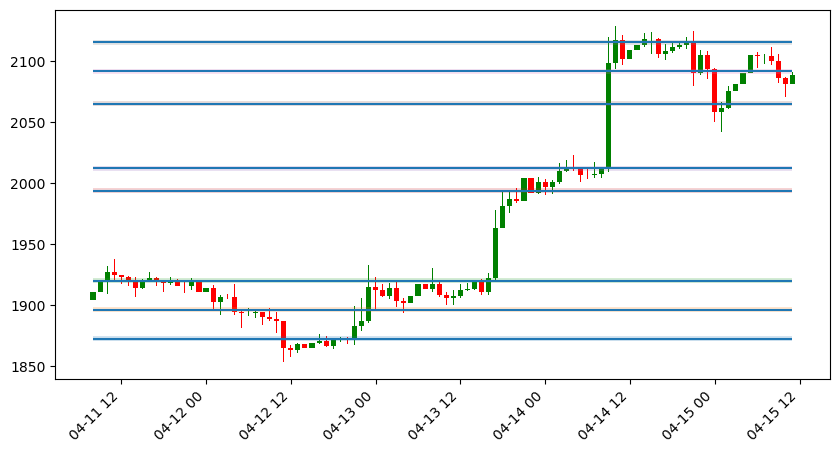

In [19]:
print(price_range[peaks])
draw_candle_chart(sample_df, price_range[peaks], 0.001)

In [21]:
bb_int = 30
bb_dev = 2

                  Open    Close     High      Low    Volume
Close_Time                                                 
1679274899999  1771.42  1777.05  1778.59  1761.62   9531.80
1679275799999  1777.06  1777.17  1778.70  1773.93   3494.78
1679276699999  1777.17  1777.98  1779.40  1774.04   4846.95
1679277599999  1777.98  1774.79  1779.20  1771.16   4508.23
1679278499999  1774.78  1779.04  1779.82  1771.58   6104.29
...                ...      ...      ...      ...       ...
1681526699999  2085.77  2090.15  2091.01  2085.77  10170.27
1681527599999  2090.15  2089.05  2091.50  2089.00   6085.84
1681528499999  2089.06  2091.81  2093.82  2089.00   2537.51
1681529399999  2091.81  2090.69  2092.90  2090.08   2705.82
1681530299999  2090.68  2087.79  2092.13  2086.00   5025.73

[2502 rows x 5 columns]
                            Open    Close     High      Low    Volume  \
Close_Time                                                              
2023-03-20 09:14:59.999  1771.42  1777.05  1778.5

C:\Users\George\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\George\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


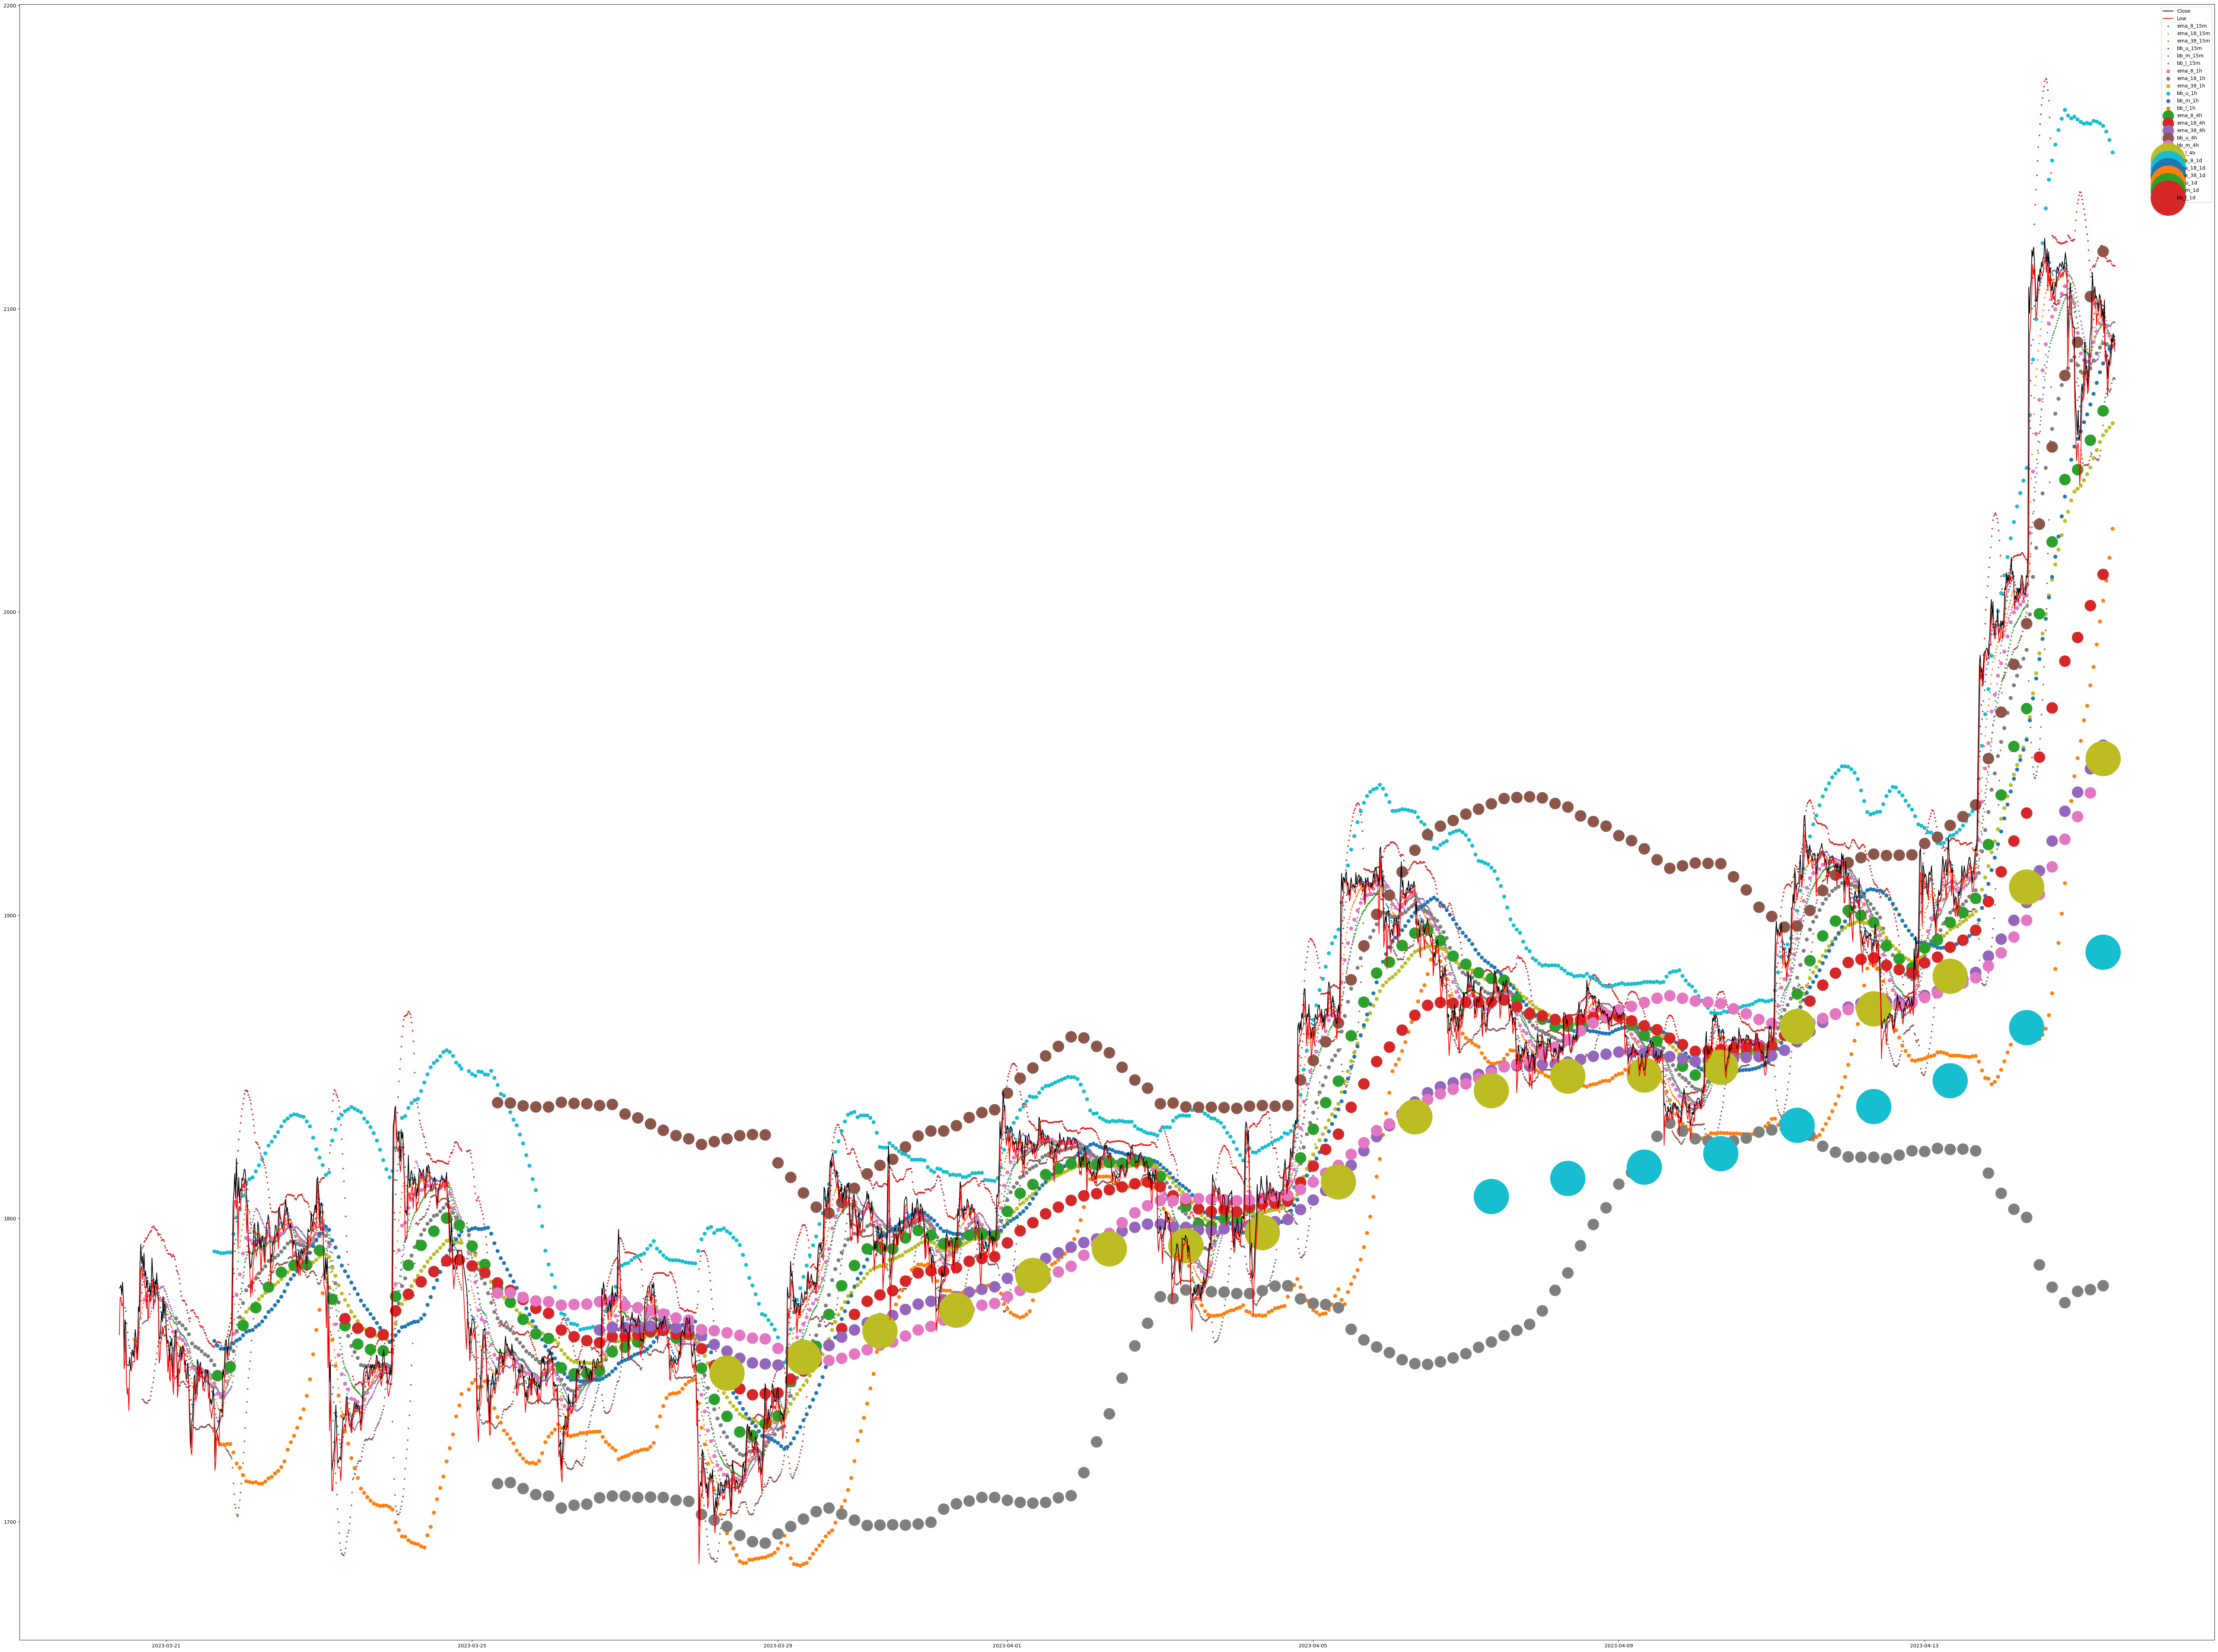

In [22]:
# using 
df = get_klines(symbol, interval_arr[0], start_time, end_time).copy()
df = df.astype(float).round(2)
print(df)

for interval in interval_arr:
    raw_df = get_klines(symbol, interval, start_time, end_time)
    for ema in ema_arr:
        column_name = 'ema_{}_{}'.format(ema, interval)
        df[column_name] = ta.trend.ema_indicator(raw_df.Close, window=ema)

    bb = ta.volatility.BollingerBands(raw_df.Close, window=bb_int, window_dev=bb_dev)
    df[f'bb_u_{interval}'] = bb.bollinger_hband()
    df[f'bb_m_{interval}'] = bb.bollinger_mavg()
    df[f'bb_l_{interval}'] = bb.bollinger_lband()        

time_format(timezone)

plt.figure(figsize=(80, 60))
plt.plot(df.Close, label = 'Close', c ='black')
plt.plot(df.Low, label = 'Low', c = 'red')

# df = df.drop(columns=df.columns)

for interval in interval_arr:
    MARKER_SIZES = {'15m': 5, '1h': 50, '4h': 500, '1d': 5000}
    marker_size = MARKER_SIZES.get(interval, 1)
    
    for ema in ema_arr:

        plt.scatter(df.index, df[f'ema_{ema}_{interval}'], s = marker_size, label = f'ema_{ema}_{interval}')

    for bb in bb_arr:
        
        plt.scatter(df.index, df[f'{bb}_{interval}'], s = marker_size, label = f'{bb}_{interval}')
        
print(df)
        
plt.legend()
plt.show()

# df_ema = pd.DataFrame(index=pd.date_range(start=start_time, end=end_time))

# for interval in interval_arr:

# df[['Open', 'Close', 'High', 'Low', 'Volume']].astype(float).round(2)

        
# indicators(df)


In [23]:
def check_cross(df, kd_dir):
    up = df['slow_k'] > df['slow_d']
    down = df['slow_k'] < df['slow_d']
    if kd_dir == 'Up':
        return up.diff() & up
    if kd_dir == 'Any':
        return up.diff()
    if kd_dir == 'Down':
        return down.diff() & down

def traceback_rsi(row, back_len, excl, rsi_bot):

    # second leg
    first_leg_rsi = df.loc[row - back_len - excl:row - excl, 'rsi']
    return any(first_leg_rsi <= rsi_bot)

    
def indicators(df):

# ema
    for i in (8, 18, 38):
        df['ema_'+str(i)] = ta.trend.ema_indicator(df.Close, window=i)
        
# bband
    bb_int = 30
    bb_dev = 2
    bb = ta.volatility.BollingerBands(df['Close'], window=bb_int, window_dev=bb_dev)
    df['bb_u'] = bb.bollinger_hband()
    df['bb_m'] = bb.bollinger_mavg()
    df['bb_l'] = bb.bollinger_lband()        

# atr
    df['atr'] = ta.volatility.average_true_range(df.High, df.Low, df.Close)
    
# rsi
    rsi_int = 14
    df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window = rsi_int).rsi()

# kd
    kd_int = 14
    d_int = 3
   
    kd_df = pd.DataFrame()
    kd_df[str(kd_int) + '-Low'] = df['Low'].rolling(kd_int).min()
    kd_df[str(kd_int) + '-High'] = df['High'].rolling(kd_int).max()
    df['slow_k'] = (df['Close'] - kd_df[str(kd_int) + '-Low'])*100/(kd_df[str(kd_int) + '-High'] - kd_df[str(kd_int) + '-Low'])
    df['slow_d'] = df['slow_k'].rolling(d_int).mean()
    
# kd cross
#     df['kd_cross'] = check_cross(df, kd_dir)

# second leg

#     back_len = 20
#     excl = 4
#     rsi_bot = 30

#     df.loc[:, 'sec_leg'] = df.index.map(lambda row: traceback_rsi(row, back_len, excl, rsi_bot))



In [24]:
def conditions(df):

    for index, row in df.iterrows():
        # c1
        df['c1'] = df['Open'].shift(1) > df['Close'].shift(1)
        # c2
        df['c2'] = df['Close'] > df['Open']
        # c3
        df['c3'] = df['Close'] >= df['Open'].shift(1)
        
        df['c4'] = df['sec_leg']


    # 條件達成
    df['signal'] = False
    df.loc[df.c1 & df.c2 & df.c3 & df.c4, 'signal'] = True


    # 下一根進場
    df['open_entry'] = False
    for i in range(len(df) - 1):
        if df.loc[i, 'signal'] == True:
            df.loc[i + 1, 'open_entry'] = True
#     print(df[df['Close_Time'].str.contains('2023-03-11 16')])
    
    return df

In [ ]:
conditions(df)

In [ ]:
entry_df = conditions(df).copy()

in_position = False
stop_loss = np.nan
take_profit = np.nan
close_val = entry_df['Close']
low_val = entry_df['Low']
atr_val = entry_df['atr']


for index, row in entry_df.iterrows():

    if index == 0:
        continue
    
    elif entry_df.at[index, 'open_entry'] == True:
   
        entry_df.at[index, 'entry_p'] = close_val.shift(1).at[index]
        entry_df.at[index, 'stop_loss'] = low_val.shift(1).at[index] - sl_atr * atr_val.shift(1).at[index]
        entry_df.at[index, 'take_profit'] = close_val.shift(1).at[index] * (1 + pro_per/10)
        entry_df.at[index, 'position'] = 'Buy'
        in_position = True
        stop_loss = entry_df.at[index, 'stop_loss']
        take_profit = entry_df.at[index, 'take_profit']
    

    # 吃筍
    #-----------------------------重要-----------------------------
    # 若用 if 寫，則有可能入場馬上吃筍，若用 elif 則一個 iteration 只會執行一次
    elif in_position == True and (entry_df.at[index, 'Close'] <= stop_loss):
        entry_df.at[index, 'position'] = 'Stop'
        in_position = False
        stop_loss = np.nan
        take_profit = np.nan

    # set take profit
    elif in_position == True and (entry_df.at[index, 'High'] >= take_profit):
        entry_df.at[index, 'position'] = 'Sell'
        in_position = False
        stop_loss = np.nan
        take_profit = np.nan
        
entry_df.to_csv('entry_df.csv')
        
raw_entry_df = entry_df.copy()

# 過濾有訊號或事件發生的Ｋ線
entry_df = entry_df[(entry_df['open_entry'] == True) |
              (entry_df['signal'] == True) | 
              (entry_df['position'] == 'Buy') |
              (entry_df['position'] == 'Sell') |
              (entry_df['position'] == 'Stop')]

print(entry_df)

In [ ]:
# 部位回測

pos_df = entry_df.copy()
pos_df = pos_df.reset_index(drop = True)
pos_df = pos_df[(pos_df['position'] == 'Buy') |
              (pos_df['position'] == 'Sell') |
              (pos_df['position'] == 'Stop')]

# 一次進場多少單位
pos_size = 1

col = ['Close_Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'bb_l', 'position','entry_p', 'stop_loss', 'take_profit']
pos = pos_df[col]
pos = pos.reset_index(drop = True)


for index, row in pos.iterrows():
    
    current_pos = 0
    
    # 進場
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'size'] = pos_size
        pos.exit_p = np.nan
    
    # 出場
    if pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        
        #-----------------------------重要-----------------------------
        # 實戰需即刻出場
        
        # 停利：達成條件時收盤價
        if pos.at[index, 'position'] == 'Sell':
#             pos.at[index, 'exit_p'] = pos.at[index, 'Close']
            for i in range(index -1, -1, -1):
                if pos.at[i, 'position'] == 'Buy':
                    pos.at[index, 'exit_p'] = pos.at[i, 'take_profit']
                break

        # 停損：打到進場停損點（往回跌代，直到最近的'Buy'及其'stop_loss'）
        if pos.at[index, 'position'] == 'Stop':
            for i in range(index -1, -1, -1):
                if pos.at[i, 'position'] == 'Buy':
                    pos.at[index, 'exit_p'] = pos.at[i, 'stop_loss']
                break

        # 計算每次出場部位大小（每次出場皆清倉）
        for i in range(index -1, -1, -1):
            if pos.at[i, 'position'] == 'Buy':
                current_pos += pos.at[i, 'size']
                if i == 0:
                    pos.at[index, 'size'] = -current_pos
                else:
                    continue
            else:
                pos.at[index, 'size'] = -current_pos
                current_pos = 0
                break


# 計算部位價值
for index, row in pos.iterrows():
    if pos.at[index, 'position'] == 'Buy':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'entry_p'], 4)
    elif pos.at[index, 'position'] == 'Sell' or pos.at[index, 'position'] == 'Stop':
        pos.at[index, 'amt'] = round(pos.at[index, 'size'] * pos.at[index, 'exit_p'], 4)


# 若最後一筆為 Buy，移除該單，迭代驗證
for index, row in pos.iloc[::-1].iterrows():
    if row['position'] == 'Buy':
        pos = pos.drop(index)
    else:
        break


# 手續費、滑點、價差
fee = 0.05 / 100
amt_abs_sum = pos.amt.abs().sum()
ttl_fee = amt_abs_sum * fee


# 損益
leverage = 10
ttl_profit = -pos.amt.sum() - ttl_fee


# 計算獲利/虧損次數
agg_amts = []

for i in range(len(pos) - 1, -1, -1):

    if pos.loc[i, 'position'] in ['Stop', 'Sell']:
        
        # look out for the + sign
        total_amt = pos.loc[i, 'amt'] + np.absolute(pos.loc[i, 'amt']) * fee
        
        # iterate backwards from the current row until reaching another 'Stop' or 'Sell'
        # watch out for the + in total_amt += trading_fee
        j = i - 1
        while j >= 0 and pos.loc[j, 'position'] not in ['Stop', 'Sell']:
            total_amt += pos.loc[j, 'amt']
            trading_fee = np.absolute(pos.loc[j, 'amt']) * fee
            total_amt += trading_fee
            j -= 1
        
        # add the aggregated amount to the list
        agg_amts.append(total_amt)

agg_amts.reverse()


# 計算進場最大部位，最大損益
consec_entry = 0
position_amt_sum = 0
max_consec_entry = 0
max_position = 0
max_profit = 0
max_loss = 0

for index, row in pos.iterrows():
    
    if row['position'] == 'Buy':
        
        consec_entry += 1
        position_amt_sum += row['amt']
        
    elif row['position'] in ['Sell', 'Stop']:
        
        if consec_entry > max_consec_entry:
            max_consec_entry = consec_entry
            max_position = position_amt_sum
            
        position_amt_sum += row['amt']
        
        if -position_amt_sum > max_profit:
            max_profit = -position_amt_sum
            
        if -position_amt_sum < max_loss:
            max_loss = -position_amt_sum
            
        consec_entry = 0
        position_amt_sum = 0
    
    else:
        pass

# 最大部位
profit_per = "{:.2f}%".format(ttl_profit / (max_position/leverage) * 100)


# 勝率
wins = 0
loses = 0

for trade in agg_amts:
    if trade < 0:
        wins += 1
    elif trade > 0:
        loses += 1

win_rate = "{:.2f}%".format(wins / (wins + loses) * 100)


# 結果
result = {'Profit': [round(ttl_profit, 2)],
          'Fee': [round(ttl_fee, 2)],
          'Max_Profit': [round(max_profit, 2)],
          'Max_Loss': [round(max_loss, 2)],
          'Max_Entry': [max_consec_entry],
          'Max_Position': [round(max_position, 2)],
          'Profit_%': [profit_per],
          'Win_Rate': [win_rate]}


result_df = pd.DataFrame(result)

print(result_df)
print()
print(pos)

pos.to_csv('pos.csv')


In [ ]:
cumulative_values = []
cumulative_sum = 0
for value in agg_amts:
    cumulative_sum -= value
    cumulative_values.append(cumulative_sum)

plt.fill_between(range(len(cumulative_values)), cumulative_values, 0)

plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of Values')

plt.show()

print(cumulative_values)

In [ ]:
plt_df = raw_entry_df.copy()

plt.figure(figsize=(80, 36))
plt.ylabel('Close')
plt.plot(plt_df.Close, label = 'Close', c ='black')

i = 0
while i < len(plt_df):
    if pd.isna(plt_df.position[i]):
        i += 1
    elif plt_df.position[i] == 'Buy':
        j = i + 1
        while j < len(plt_df) and (pd.isna(plt_df.position[j]) or plt_df.position[j] == 'Buy'):
            j += 1
        if j < len(plt_df) and plt_df.position[j] == 'Sell':
            # Paint all previous 'Buy's green dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'go', label='_', markersize=20)
            i = j
        elif j < len(plt_df) and plt_df.position[j] == 'Stop':
            # Paint all previous 'Buy's red dot
            for k in range(i, j+1):
                plt.plot(k, plt_df.entry_p[k], 'ro', label='_', markersize=20)
            i = j + 1
        else:
            i = j
    else:
        i += 1

plt.legend()
plt.show()


# 之所以出現大量紅點，原因為：連續加倉會調整整個部位停利和停損，因此一些進倉部位會因為調高後的＂整個部位＂停損而出場，但該入場損益依舊為正
# 意思是該部位之停損已經高於許多前面部位之進場點位